In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Sparkling.csv')

### 1.Read the data as an appropriate Time Series data and plot the data.

In [3]:
df1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df1.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [5]:
df1=pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [6]:
df1.dtypes

Sparkling    int64
dtype: object

In [7]:
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [8]:
df1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


<function matplotlib.pyplot.show(close=None, block=None)>

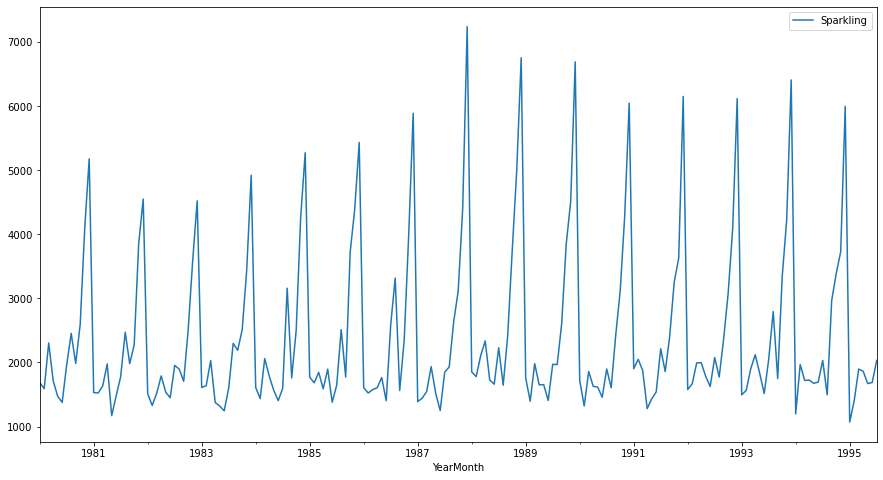

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df1.plot()
plt.show

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
df1.isnull().sum()

Sparkling    0
dtype: int64

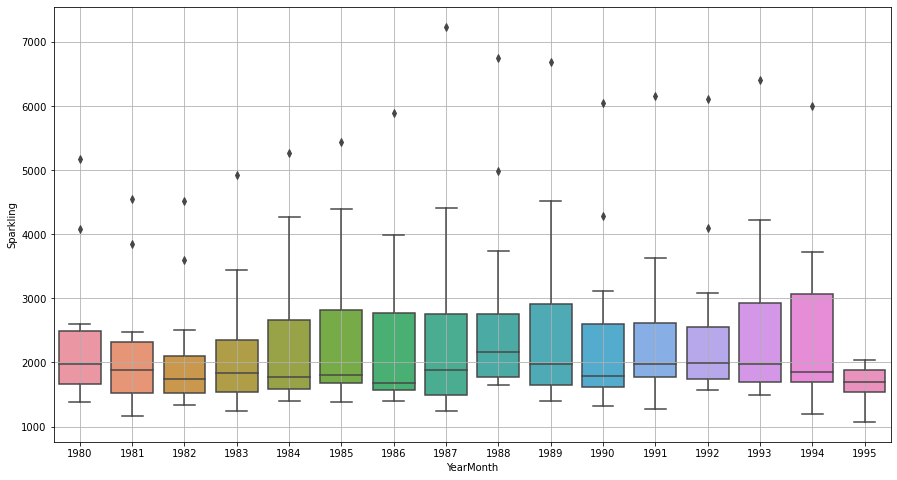

In [11]:
import seaborn as sns
sns.boxplot(x = df1.index.year,y = df1['Sparkling'])
plt.grid();

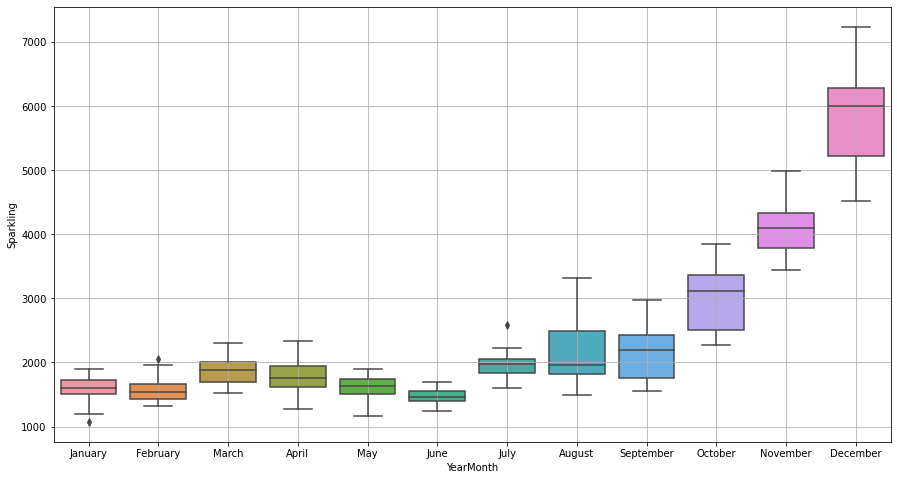

In [12]:
sns.boxplot(x = df1.index.month_name(),y = df1['Sparkling'])
plt.grid();

In [13]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month, index = df1.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


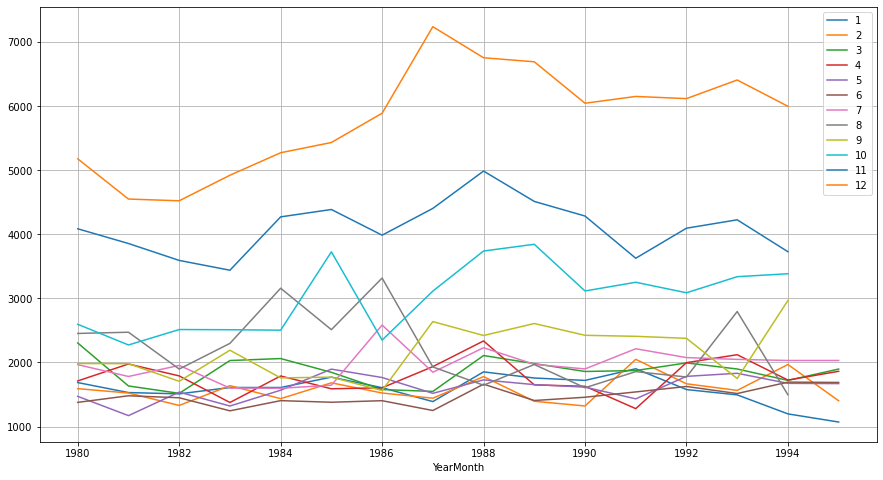

In [14]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

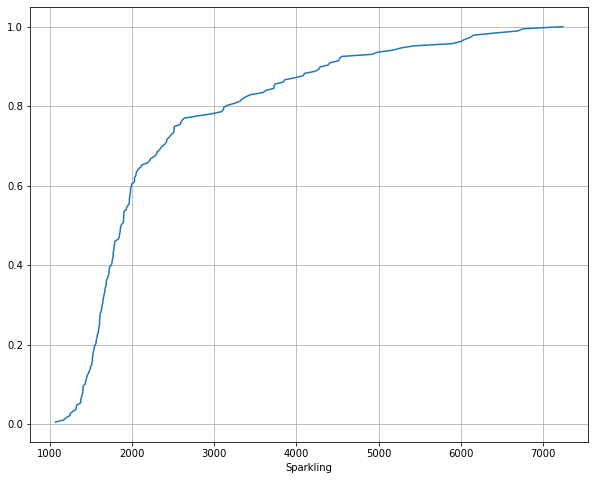

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 8))
cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

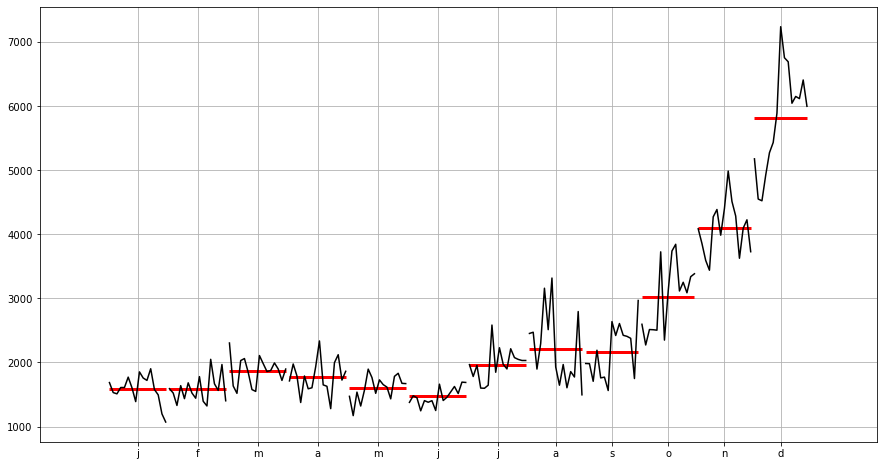

In [16]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df1['Sparkling'])
plt.grid();

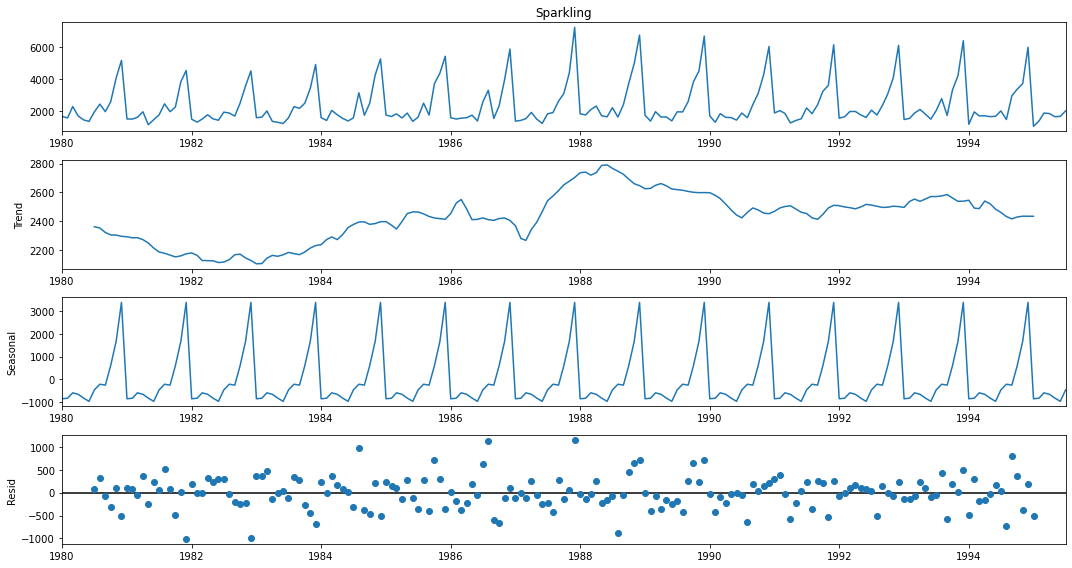

In [17]:
decomposition = seasonal_decompose(df1['Sparkling'],model='additive')
decomposition.plot();

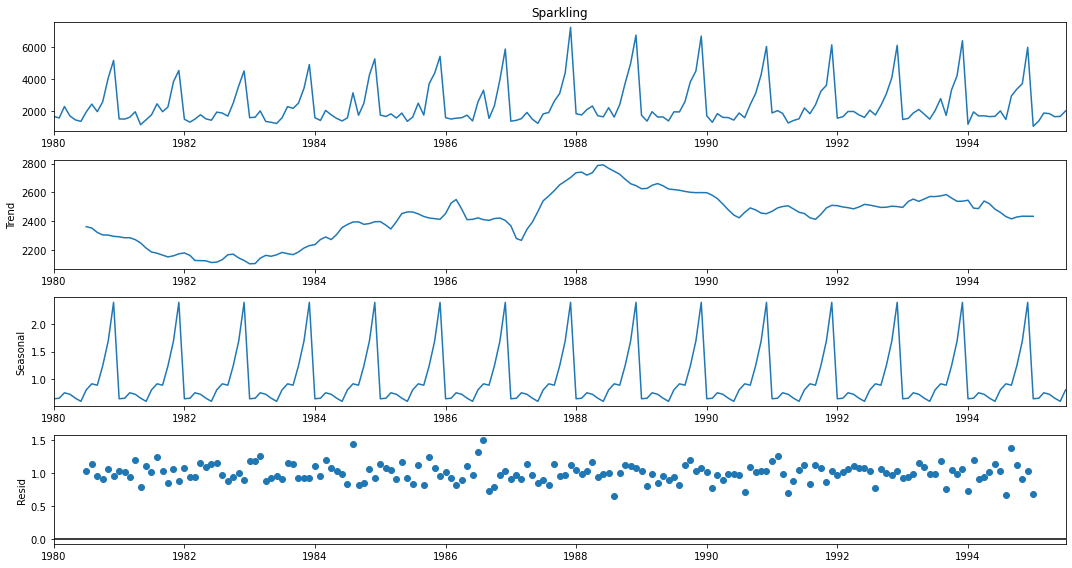

In [18]:
decomposition = seasonal_decompose(df1['Sparkling'],model='multiplicative')
decomposition.plot();

### 3.Split the data into training and test. The test data should start in 1991.

In [19]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [20]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [21]:
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [22]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


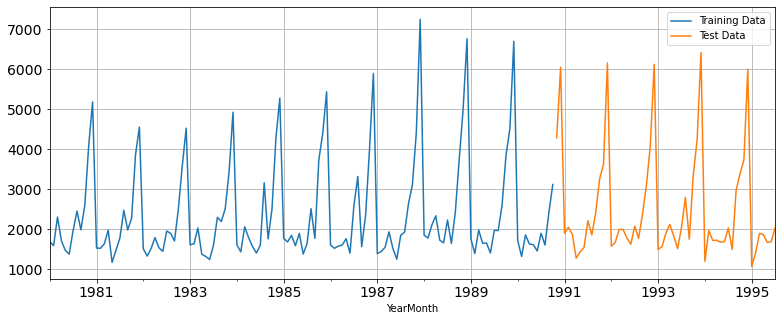

In [23]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [25]:
LinearRegression_train = train.copy()
LinearRegression_test= test.copy()

In [26]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time']  = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-06-01       1457   126
1990-07-01       1899   127
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1990-11-01       4286   131
1990-12-01       6047   132
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_test[['time']],LinearRegression_test['Sparkling'].values)

LinearRegression()

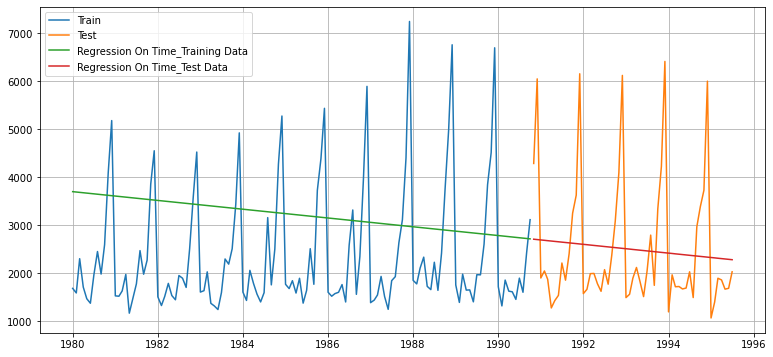

In [28]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [29]:
from sklearn import metrics

In [30]:
rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 1571.012


In [31]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1356.301


In [32]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492


In [33]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [34]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    3116
1980-02-01    3116
1980-03-01    3116
1980-04-01    3116
1980-05-01    3116
Name: naive, dtype: int64

In [35]:
NaiveModel_test['naive'] = np.asarray(test['Sparkling'])[len(np.asarray(test['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-01    2031
1990-12-01    2031
1991-01-01    2031
1991-02-01    2031
1991-03-01    2031
Name: naive, dtype: int64

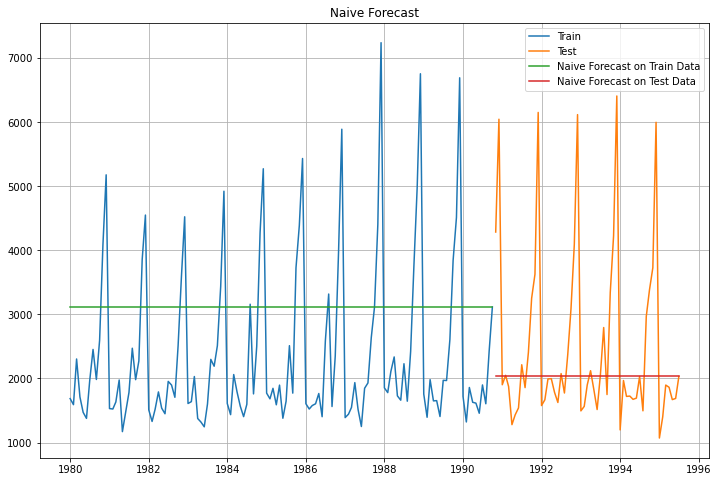

In [36]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(NaiveModel_test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Train Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))

For RegressionOnTime forecast on the Train Data,  RMSE is 1466.440


In [38]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1439.342


In [39]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693


In [40]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [41]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_forecast
YearMonth,,
1980-01-01,1686,2361.276923
1980-02-01,1591,2361.276923
1980-03-01,2304,2361.276923
1980-04-01,1712,2361.276923
1980-05-01,1471,2361.276923


In [42]:
SimpleAverage_test['mean_forecast'] = test['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1990-11-01,4286,2496.245614
1990-12-01,6047,2496.245614
1991-01-01,1902,2496.245614
1991-02-01,2049,2496.245614
1991-03-01,1874,2496.245614


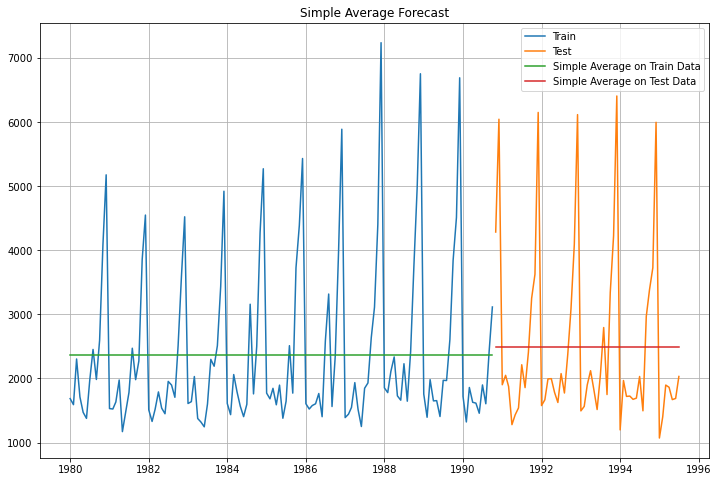

In [43]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [44]:
rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
print("For Simple Average forecast on the Train Data,  RMSE is %3.3f" %(rmse_model3_train))

For Simple Average forecast on the Train Data,  RMSE is 1257.315


In [45]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1362.076


In [46]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999


In [47]:
MovingAverage = df1.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [48]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


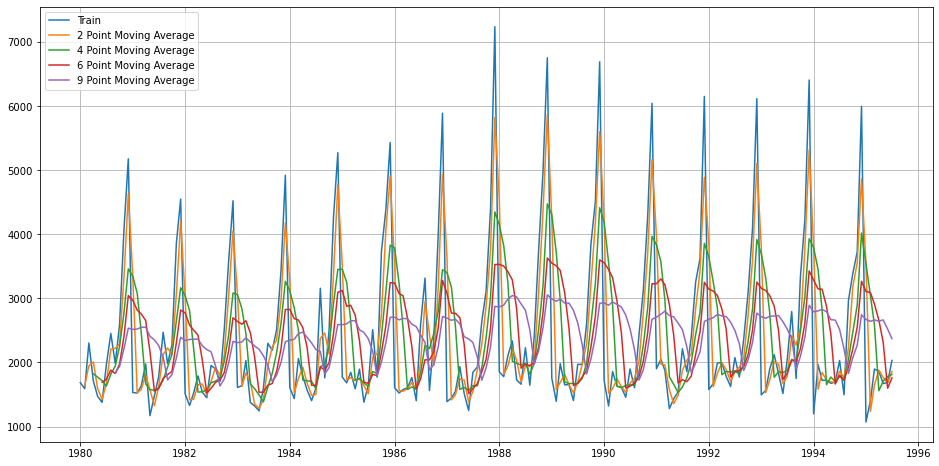

In [49]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label ='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label ='9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [50]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

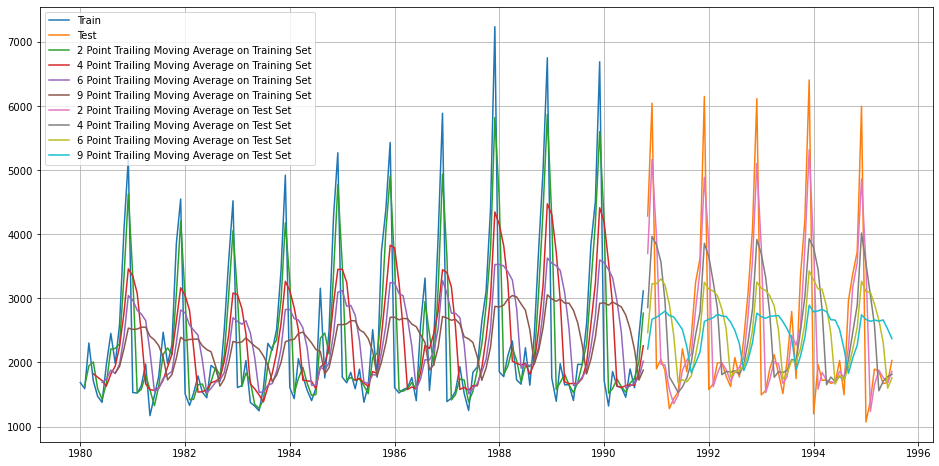

In [51]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label ='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label ='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label ='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label ='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [52]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1422.653 


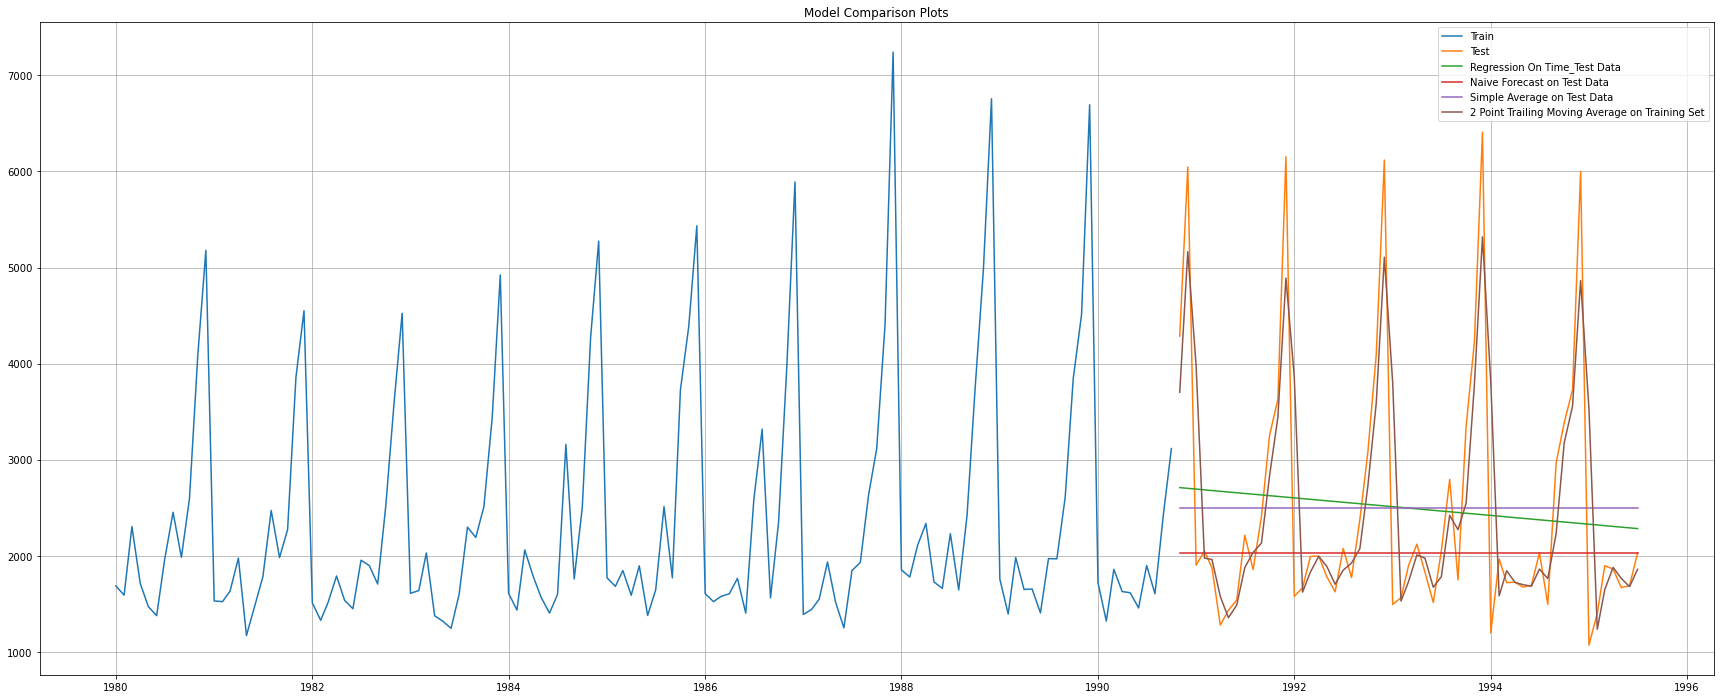

In [53]:
plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [54]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281


In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [56]:
SES_train = train.copy()
SES_test = test.copy()

In [57]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [58]:
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
model_SES_autofit.params

{'smoothing_level': 0.06994041702168571,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2108.034139790532,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
SES_train['predict'] = model_SES_autofit.forecast(steps=len(train))
SES_train.head()

,Sparkling,predict
YearMonth,,
1980-01-01,1686,NaN
1980-02-01,1591,NaN
1980-03-01,2304,NaN
1980-04-01,1712,NaN
1980-05-01,1471,NaN


In [61]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1990-11-01,4286,2429.666331
1990-12-01,6047,2429.666331
1991-01-01,1902,2429.666331
1991-02-01,2049,2429.666331
1991-03-01,1874,2429.666331


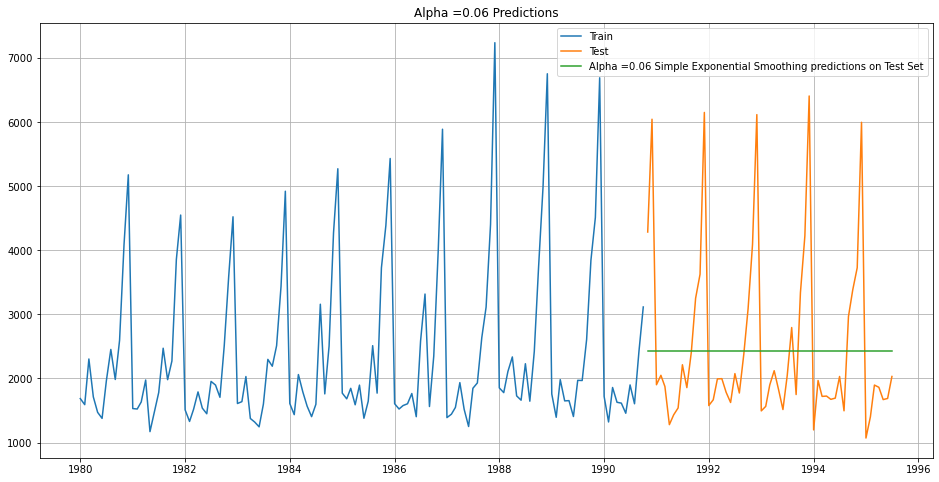

In [62]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.06 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.06 Predictions');

In [63]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.06 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.06 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1363.702


In [64]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.06,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251


In [65]:
DES_train = train.copy()
DES_test = test.copy()

In [66]:
model_DES = Holt(train,initialization_method='estimated')
model_DES=model_DES.fit()
print('')
print('==Holt model exponential smoothing estimated parameters ==')
print('')
print(model_DES.params)


==Holt model exponential smoothing estimated parameters ==

{'smoothing_level': 0.07614001422051413, 'smoothing_trend': 0.07614001422051413, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.800070851357, 'initial_trend': 2.7690564419590373, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [67]:
DES_train['predict']=model_DES.forecast(len(train))
DES_train.head()

,Sparkling,predict
YearMonth,,
1980-01-01,1686,NaN
1980-02-01,1591,NaN
1980-03-01,2304,NaN
1980-04-01,1712,NaN
1980-05-01,1471,NaN


In [68]:
DES_predict=model_DES.forecast(len(test))
DES_predict.head()

1990-11-01    2406.739632
1990-12-01    2390.171048
1991-01-01    2373.602464
1991-02-01    2357.033880
1991-03-01    2340.465296
Freq: MS, dtype: float64

Text(0.5, 1.0, 'DES Predictions')

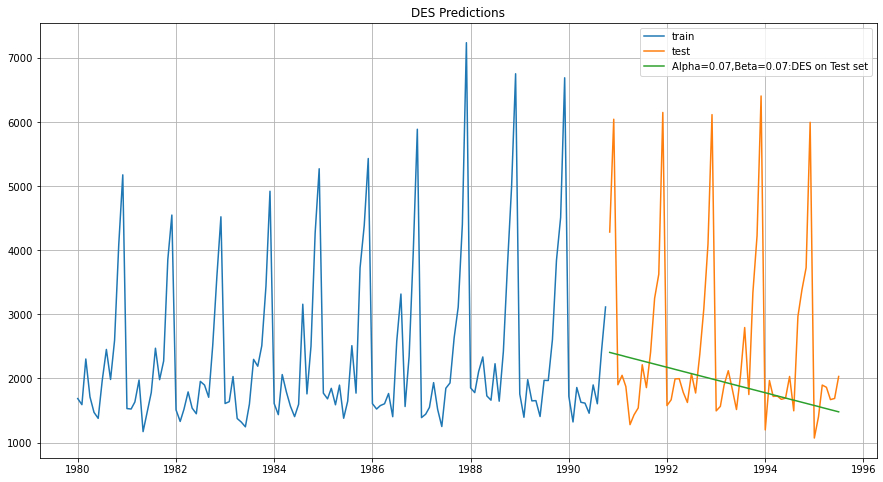

In [69]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='Alpha=0.07,Beta=0.07:DES on Test set')
plt.legend(loc='best')
plt.grid()
plt.title('DES Predictions')

In [70]:
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_predict,squared=False)
print("For Alpha=0.07,Beta=0.07 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))


For Alpha=0.07,Beta=0.07 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1472.254


In [71]:
resultsDf_6 = pd.DataFrame({'Test RMSE':[rmse_model6_test_1]}
                           ,index=['Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632


In [72]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES=model_TES.fit()
print('')
print('==Holt winters model exponential smoothing estimated parameters ==')
print('')
print(model_TES.params)


==Holt winters model exponential smoothing estimated parameters ==

{'smoothing_level': 0.07569306568824088, 'smoothing_trend': 0.03243079354510322, 'smoothing_seasonal': 0.47913593977130997, 'damping_trend': nan, 'initial_level': 2356.5265323809604, 'initial_trend': -0.7790797250530854, 'initial_seasons': array([-636.24268485, -722.99133041, -398.6335455 , -473.44377819,
       -808.44186271, -815.36460194, -384.23726708,   72.99614943,
       -237.4576044 ,  272.31934737, 1541.39471434, 2590.08838066]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [73]:
TES_predict=model_TES.forecast(len(train))
TES_predict.head()

1990-11-01    4497.227451
1990-12-01    6550.067144
1991-01-01    1620.057193
1991-02-01    1324.953921
1991-03-01    1806.743576
Freq: MS, dtype: float64

In [74]:
TES_predict=model_TES.forecast(len(test))
TES_predict.head()

1990-11-01    4497.227451
1990-12-01    6550.067144
1991-01-01    1620.057193
1991-02-01    1324.953921
1991-03-01    1806.743576
Freq: MS, dtype: float64

Text(0.5, 1.0, 'TES Predictions')

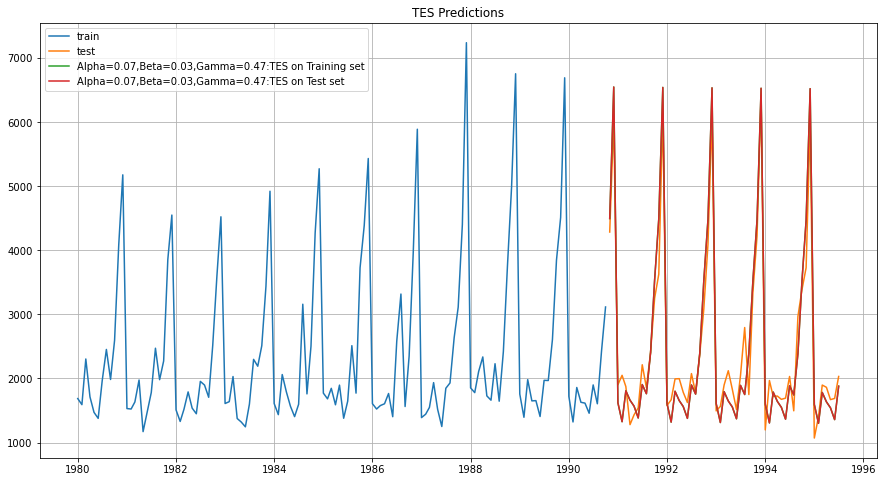

In [75]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='Alpha=0.07,Beta=0.03,Gamma=0.47:TES on Training set')
plt.plot(TES_predict,label='Alpha=0.07,Beta=0.03,Gamma=0.47:TES on Test set')
plt.legend(loc='best')
plt.grid()
plt.title('TES Predictions')

In [76]:
rmse_model7_test_1 = metrics.mean_squared_error(test.values,TES_predict,squared=False)
print("For Alpha=0.07,Beta=0.03,Gamma=0.47 TES additive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.07,Beta=0.03,Gamma=0.47 TES additive Model forecast on the Test Data, RMSE is 366.859


In [77]:
resultsDf_7 = pd.DataFrame({'Test RMSE':[rmse_model7_test_1]}
                           ,index=['Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632
"Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive",366.859156


In [78]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES=model_TES.fit()
print('')
print('==Holt winters model exponential smoothing estimated parameters ==')
print('')
print(model_TES.params)


==Holt winters model exponential smoothing estimated parameters ==

{'smoothing_level': 0.07571432471504627, 'smoothing_trend': 0.06489794789923221, 'smoothing_seasonal': 0.3765611795178487, 'damping_trend': nan, 'initial_level': 2356.5416847960546, 'initial_trend': -9.182360270735833, 'initial_seasons': array([0.71216394, 0.67829895, 0.89649052, 0.79723125, 0.64100433,
       0.63985644, 0.86674058, 1.1133546 , 0.89819179, 1.18511974,
       1.83459596, 2.32779881]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [79]:
TES_predict=model_TES.forecast(len(train))
TES_predict.head()

1990-11-01    4327.606504
1990-12-01    6208.854292
1991-01-01    1621.602282
1991-02-01    1379.868255
1991-03-01    1791.914776
Freq: MS, dtype: float64

In [80]:
TES_predict=model_TES.forecast(len(test))
TES_predict.head()

1990-11-01    4327.606504
1990-12-01    6208.854292
1991-01-01    1621.602282
1991-02-01    1379.868255
1991-03-01    1791.914776
Freq: MS, dtype: float64

Text(0.5, 1.0, 'TES Predictions')

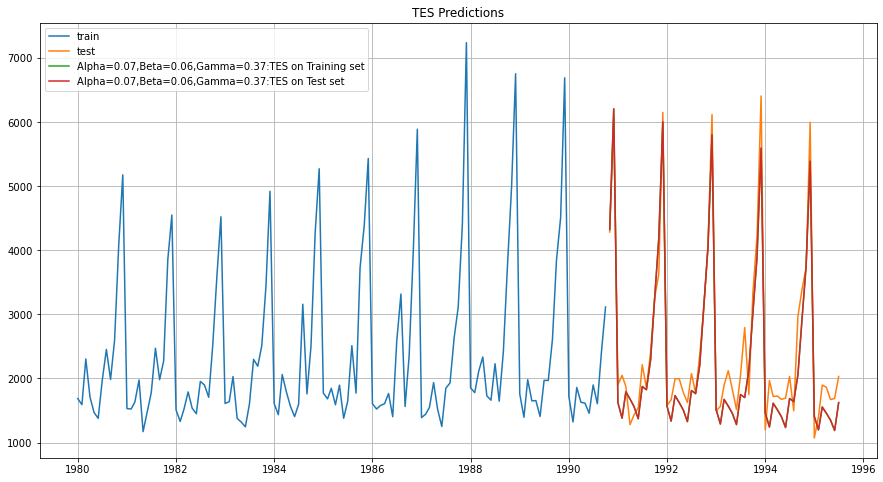

In [81]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='Alpha=0.07,Beta=0.06,Gamma=0.37:TES on Training set')
plt.plot(TES_predict,label='Alpha=0.07,Beta=0.06,Gamma=0.37:TES on Test set')
plt.legend(loc='best')
plt.grid()
plt.title('TES Predictions')

In [82]:
rmse_model8_test_1 = metrics.mean_squared_error(test.values,TES_predict,squared=False)
print("For Alpha=0.07,Beta=0.03,Gamma=0.47 TES Multiplicative Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_test_1))

For Alpha=0.07,Beta=0.03,Gamma=0.47 TES Multiplicative Model forecast on the Test Data, RMSE is 381.655


In [83]:
resultsDf_8 = pd.DataFrame({'Test RMSE':[rmse_model8_test_1]}
                           ,index=['Alpha=0.07,Beta=0.03,Gamma=0.47,TES Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632
"Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive",366.859156


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [84]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    

    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print ('Results of Dickey-Fuller Test:')
    df1test = adfuller(timeseries, autolag='AIC')
    df1output = pd.Series(df1test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df1test[4].items():
        df1output['Critical Value (%s)'%key] = value
    print (df1output,'\n')

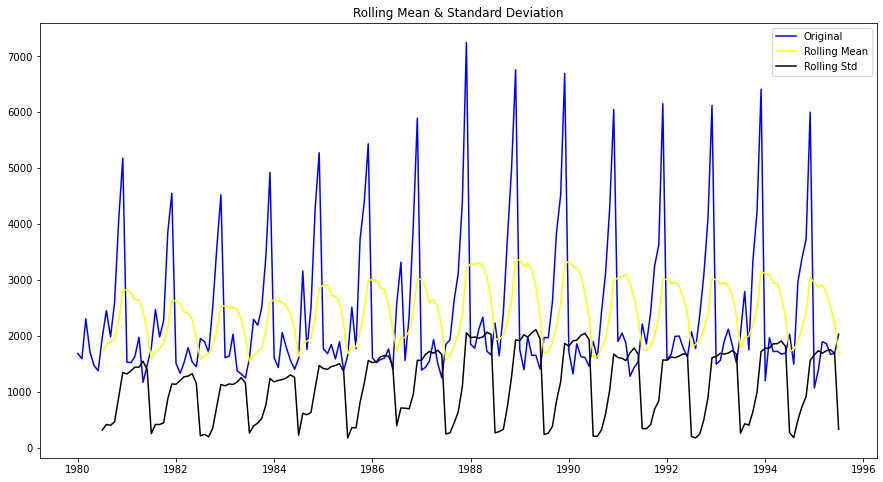

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [85]:
test_stationarity(df1['Sparkling'])

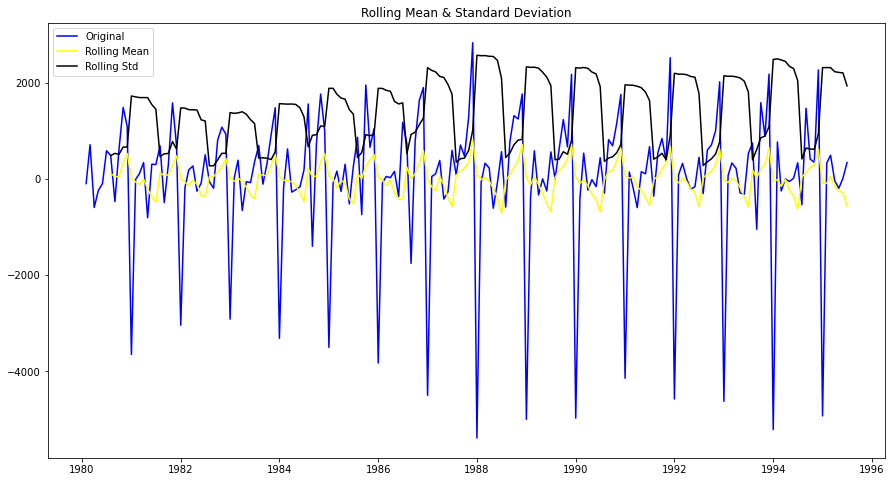

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [86]:
test_stationarity(df1['Sparkling'].diff().dropna())

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [87]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [88]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [89]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2234.707214654729
ARIMA(0, 1, 1) - AIC:2228.1503745656123
ARIMA(0, 1, 2) - AIC:2193.8823512787335
ARIMA(1, 1, 0) - AIC:2233.142091500387
ARIMA(1, 1, 1) - AIC:2196.462837274389
ARIMA(1, 1, 2) - AIC:2195.0953659369543
ARIMA(2, 1, 0) - AIC:2225.660614355666
ARIMA(2, 1, 1) - AIC:2193.8686025927564
ARIMA(2, 1, 2) - AIC:2175.568706602795


In [90]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2175.568707
7,"(2, 1, 1)",2193.868603
2,"(0, 1, 2)",2193.882351
5,"(1, 1, 2)",2195.095366
4,"(1, 1, 1)",2196.462837
6,"(2, 1, 0)",2225.660614
1,"(0, 1, 1)",2228.150375
3,"(1, 1, 0)",2233.142092
0,"(0, 1, 0)",2234.707215


In [91]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  129
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1081.784
Method:                       css-mle   S.D. of innovations           1008.048
Date:                Sat, 12 Nov 2022   AIC                           2175.569
Time:                        20:20:22   BIC                           2192.728
Sample:                    02-01-1980   HQIC                          2182.541
                         - 10-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3750      0.602      8.927      0.000       4.195       6.555
ar.L1.D.Sparkling     1.2595      0.075     16.837      0.000       1.113       1.406
ar.L2.D.Sparkling    -0.

In [92]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [93]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1365.4899056480408


In [94]:
resultsDf_9 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['ARIMA_AIC[2,1,2]'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632
"Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive",366.859156


In [95]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [96]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [97]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1921.5151801493937
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017311926
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1807.2950161665542
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1777.6492913875902
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1601.2815342101799
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1618.9670228363275
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.7268547330636
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1602.062365958745
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2193.281680181417
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.5868794008456
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1658.7576059568044
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1768.1554049142846
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1704.8427340712215
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1536.3191139436017
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1575.249693559638
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1564.9149381069078
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1536.4110100864286
SARIMA(0, 1, 

In [98]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 12)",1521.730116
50,"(1, 1, 2)","(1, 0, 2, 12)",1521.949483
80,"(2, 1, 2)","(2, 0, 2, 12)",1523.223048
77,"(2, 1, 2)","(1, 0, 2, 12)",1523.524949
26,"(0, 1, 2)","(2, 0, 2, 12)",1523.707299


In [99]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -752.865
Date:                            Sat, 12 Nov 2022   AIC                           1521.730
Time:                                    20:21:35   BIC                           1542.730
Sample:                                         0   HQIC                          1530.234
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6467      0.268     -2.413      0.016      -1.172      -0.121
ma.L1          0.1770      0.344   

In [100]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [101]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,4695.302769,380.061555,3950.395810,5440.209728
1,7225.724208,388.936133,6463.423394,7988.025021
2,1583.727332,389.318748,820.676607,2346.778057
3,1416.675905,392.176001,648.025066,2185.326743
4,1828.054943,392.214216,1059.329205,2596.780681


In [102]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

712.3947625360764


In [103]:
resultsDf_10 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['SARIMAX(1, 1, 2)x(2, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632
"Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive",366.859156


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

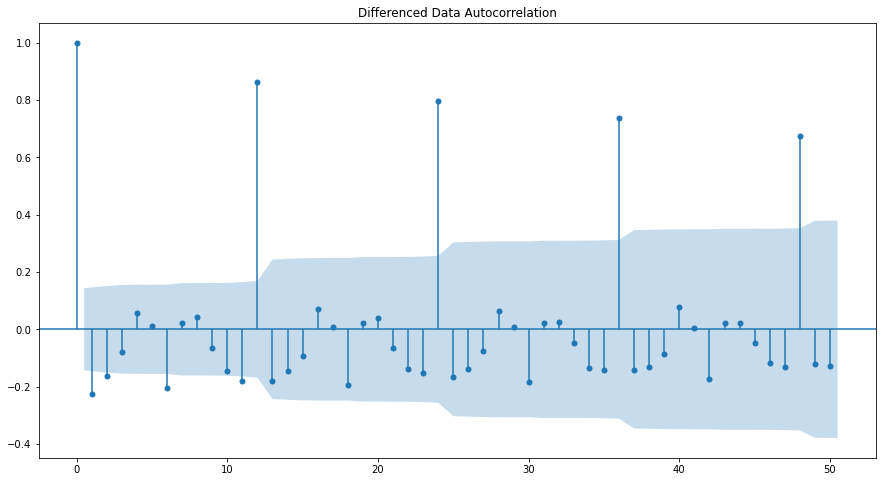

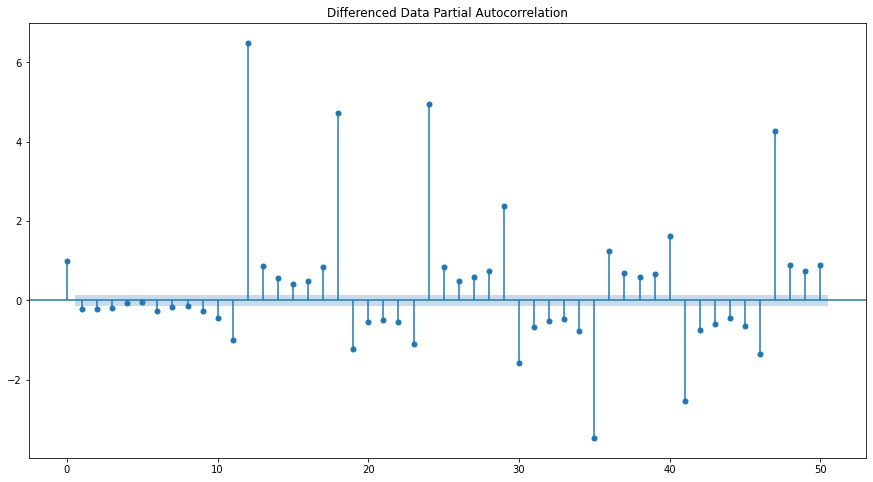

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [105]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  129
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1115.354
Method:                           css   S.D. of innovations           1376.382
Date:                Sat, 12 Nov 2022   AIC                           2234.707
Time:                        20:21:36   BIC                           2240.427
Sample:                    02-01-1980   HQIC                          2237.031
                         - 10-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0853    121.184      0.091      0.927    -226.430     248.601


In [106]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [107]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1679.3210241606218


In [108]:
resultsDf_11 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['ARIMA_ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632
"Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive",366.859156


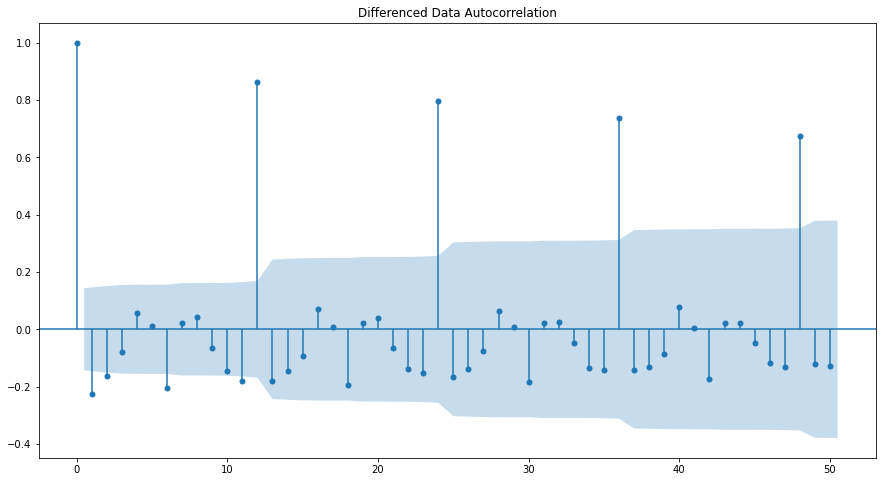

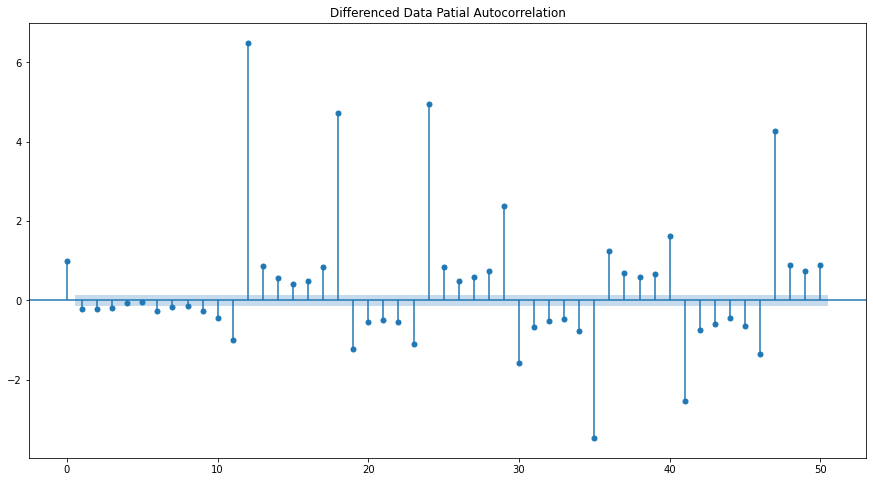

In [109]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

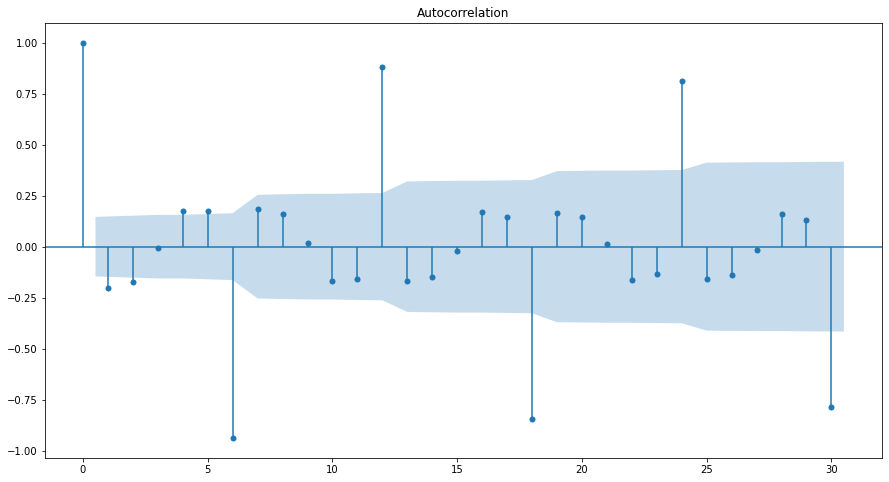

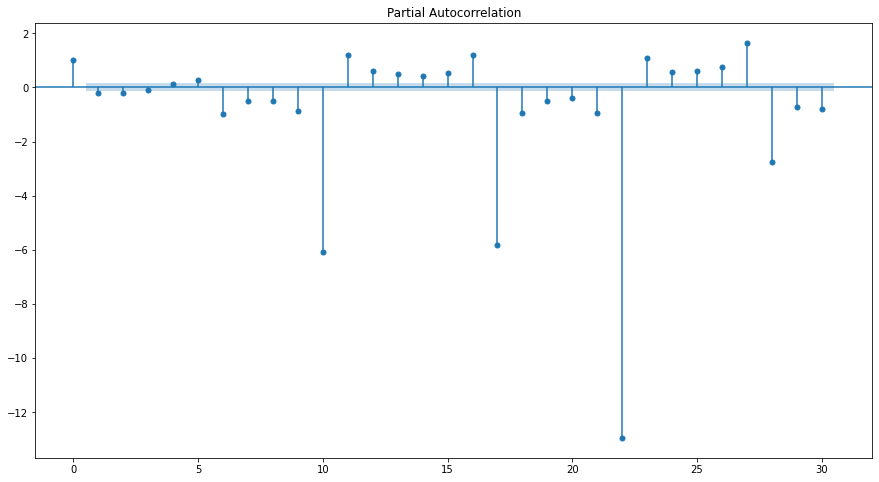

In [110]:
plot_acf((df1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [111]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  130
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -797.057
Date:                                   Sat, 12 Nov 2022   AIC                           1604.113
Time:                                           20:21:38   BIC                           1617.335
Sample:                                                0   HQIC                          1609.470
                                                   - 130                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0181      0.015    -66.917      0.000    

In [112]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [113]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,4130.964704,514.049589,3123.446023,5138.483385
1,6297.147892,726.975901,4872.301309,7721.994476
2,1149.369563,890.360014,-595.703998,2894.443123
3,774.035176,1028.098818,-1241.001480,2789.071832
4,1364.332261,1149.449175,-888.546723,3617.211246


In [114]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

1359.3418779098886


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [115]:
resultsDf_12 = pd.DataFrame({'Test RMSE':[rmse]}
                           ,index=['SARIMA_ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,1356.301492
NaiveModel,1439.341693
Simple Average,1362.075999
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.06,SimpleExponentialSmoothing",1363.702251
"Alpha=0.07,Beta=0.07,DoubleExponentialSmoothing",1472.253632
"Alpha=0.07,Beta=0.03,Gamma=0.47,TES Additive",366.859156


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [116]:
full_data_model = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1230.438
Date:                                 Sat, 12 Nov 2022   AIC                           2470.877
Time:                                         20:21:38   BIC                           2486.284
Sample:                                     01-01-1980   HQIC                          2477.133
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.6232      0.748      0.833      0.405      -0.844       2

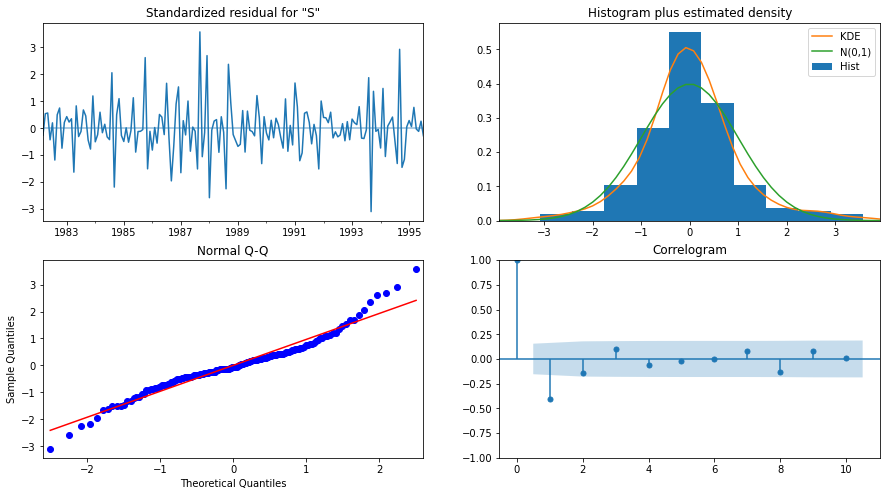

In [117]:
results_full_data_model.plot_diagnostics();

In [118]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [119]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1916.095176,519.424291,898.042273,2934.148080
1995-09-01,2453.017397,734.576877,1013.273174,3892.761621
1995-10-01,3357.717486,899.669263,1594.398132,5121.036840
1995-11-01,4089.906944,1038.848583,2053.801137,6126.012751
1995-12-01,6388.482026,1161.468025,4112.046529,8664.917524


In [120]:
rmse = mean_squared_error(df1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 608.3958002882621


In [121]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1991-01-01',end='1991-12-31', freq='M'))

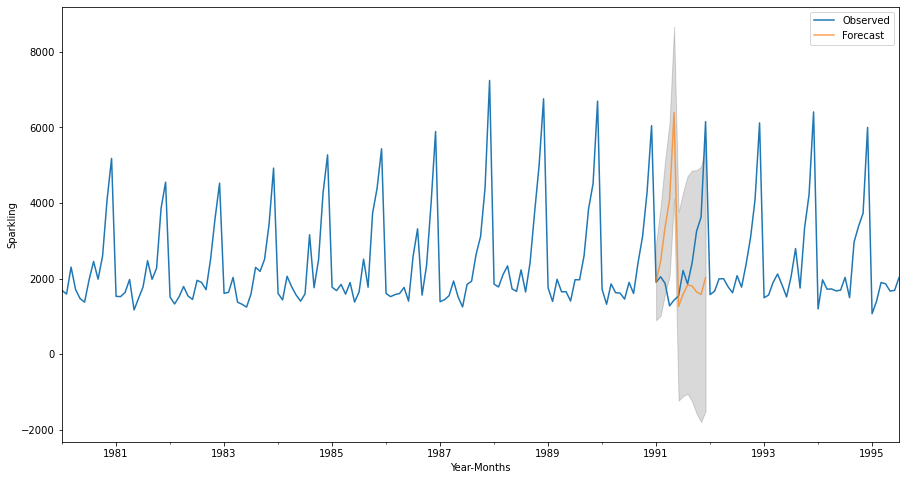

In [122]:
axis = df1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_data['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_data.index, pred_full_manual_SARIMA_data['mean_ci_lower'], 
                  pred_full_manual_SARIMA_data['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()